/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/gpr.py:346: UserWarnin

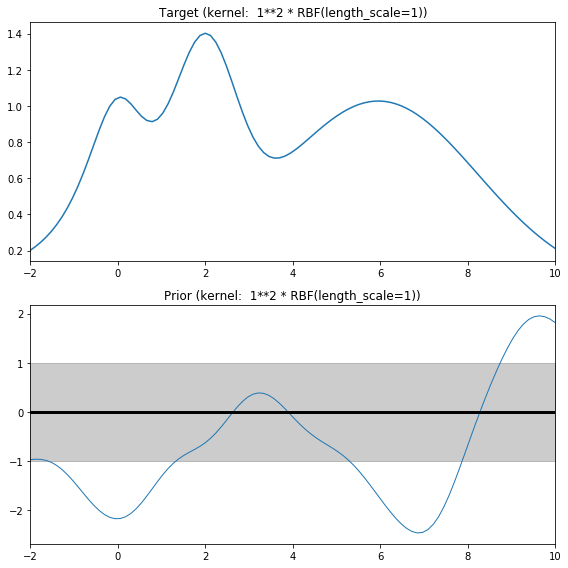

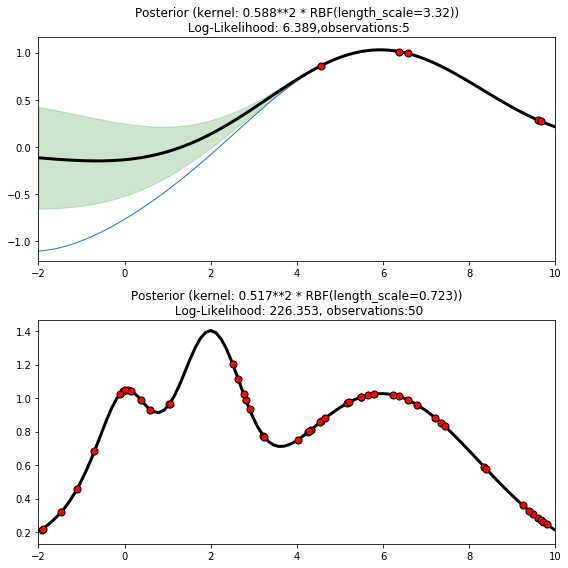

In [0]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)


kernels = [1.0 * RBF(length_scale=1, length_scale_bounds=(1e-1, 10.0))
#            ,
#            1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
#            1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
#                                 length_scale_bounds=(0.1, 10.0),
#                                 periodicity_bounds=(1.0, 10.0)),
#            ConstantKernel(0.1, (0.01, 10.0))
#                * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
#            1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
#                         nu=1.5)
          ]

for kernel in kernels:
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)
    
    # Plot target
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(-2, 10, 100)
    y=np.exp(-(X_ - 2)**2) + np.exp(-(X_ - 6)**2/10) + 1/ (X_**2 + 1)
    plt.plot(X_,y)
    plt.xlim(-2, 10)
    plt.ylim(None, None)
    plt.title("Target (kernel:  %s)" % kernel, fontsize=12)
    

    # Plot prior
  
    plt.subplot(2, 1, 2)
    X_ = np.linspace(-2, 10, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 1)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(-2, 10)
    plt.ylim(None, None)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)
    plt.tight_layout()

    
    # Generate data and fit GP
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    rng = np.random.RandomState(4)
    X = rng.uniform(-2, 10, 5)[:, np.newaxis]
    y=np.exp(-(X[:, 0] - 2)**2) + np.exp(-(X[:, 0] - 6)**2/10) + 1/ (X[:, 0]**2 + 1)
    #y = np.sin((X[:, 0] - 2.5)**2)
    gp.fit(X, y)
    

    # Plot posterior
    plt.subplot(2, 1, 1)
    X_ = np.linspace(-2, 10, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='g')

    y_samples = gp.sample_y(X_[:, np.newaxis], 1)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(-2, 10)
    plt.ylim(None, None)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f,observations:5"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
   
    # Generate data and fit GP
    plt.subplot(2, 1, 2)
    rng = np.random.RandomState(4)
    X = rng.uniform(-2, 10, 50)[:, np.newaxis]
    y=np.exp(-(X[:, 0] - 2)**2) + np.exp(-(X[:, 0] - 6)**2/10) + 1/ (X[:, 0]**2 + 1)
    #y = np.sin((X[:, 0] - 2.5)**2)
    gp.fit(X, y)
    

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(-2, 10, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='g')

    y_samples = gp.sample_y(X_[:, np.newaxis], 1)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(-2, 10)
    plt.ylim(None, None)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f, observations:50"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()
    


    

plt.show()